# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization skills, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

## Instructions

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using hvPlot and GeoViews. Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `geo` parameter to True.
    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `frame_width` parameter to 700.
    * Set the `frame_height` parameter to 500.
    * Include a descriptive title.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [43]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path

## Import the data 

In [44]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
file_path = Path("Resources/sfo_neighborhoods_census_data.csv")
sfo_data_df = pd.read_csv(file_path, index_col="year")

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [45]:
# Select only numeric columns
numeric_columns = sfo_data_df.select_dtypes(include=[np.number])

# Create a numerical aggregation that groups the data by the year and then averages the results
housing_units_by_year = numeric_columns.groupby("year").mean()

# Review the DataFrame
display(housing_units_by_year.head())

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [46]:
# Create a visual aggregation explore the housing units by year
housing_units_by_year_plot = housing_units_by_year.hvplot.bar(
    x="year",
    y="housing_units",
    xlabel="Year",
    ylabel="Housing Units",
    title="Housing Units per Year in San Francisco",
    color="blue",
    width=800,
    height=400,
    ylim=(housing_units_by_year["housing_units"].min() - 5000, housing_units_by_year["housing_units"].max() + 5000),
    rot=45,
)

# Show the plot
housing_units_by_year_plot

:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question:** What is the overall trend in housing_units over the period being analyzed?

**Answer:** # The trend in housing units over the period being analyzed appears to be increasing each year.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [47]:
# Select only numeric columns
numeric_columns = sfo_data_df.select_dtypes(include=[np.number])

# Create a numerical aggregation by grouping the data by year and averaging the results
averages_by_year = numeric_columns.groupby("year").mean()

# Find the lowest gross rent reported for the years included in the DataFrame
lowest_gross_rent = averages_by_year['gross_rent'].min()
print(f"The lowest gross rent reported for the years included in the DataFrame is: {lowest_gross_rent}")

# Create a new DataFrame without the "housing_units" column
prices_square_foot_by_year = averages_by_year.drop(columns=['housing_units'])

# Plot the prices_square_foot_by_year DataFrame using hvplot
prices_square_foot_by_year_plot = prices_square_foot_by_year.hvplot.line(
    xlabel='Year',
    ylabel='Price per Sqft / Gross Rent',
    title='Average Sale Price per Square Foot and Gross Rent by Year',
    width=800,
    height=400,
    grid=True
)

The lowest gross rent reported for the years included in the DataFrame is: 1239.0


**Question:** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer:** $1239

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [48]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
prices_square_foot_by_year = averages_by_year.drop(columns=['housing_units'])

# Review the DataFrame
display(prices_square_foot_by_year.head())

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [49]:
# Display the dataframe
display(prices_square_foot_by_year)

# Plot prices_square_foot_by_year DataFrame using hvplot
prices_square_foot_by_year_plot = prices_square_foot_by_year.hvplot.line(
    xlabel='Year',
    ylabel='Price per Sqft / Gross Rent',
    title='Average Sale Price per Square Foot and Gross Rent by Year',
    width=800,
    height=400,
    grid=True
)

# Show the plot
prices_square_foot_by_year_plot

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question:** Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer:** Yes, the year 2011 experienced a drop in the average sale price per square foot compared to 2010.


**Question:** If so, did the gross rent increase or decrease during that year?

**Answer:** # In 2011, the gross rent increased compared to the previous year (2010), despite the drop in the average sale price per square foot.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [50]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(['year', 'neighborhood']).mean()

# Review the DataFrame
prices_by_year_by_neighborhood.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945       372560.0      1239.0
     Anza Vista                 267.932583       372560.0      1239.0
     Bayview                    170.098665       372560.0      1239.0
     Buena Vista Park           347.394919       372560.0      1239.0
     Central Richmond           319.027623       372560.0      1239.0

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [51]:
# Filter out the "housing_units" column to create a DataFrame that includes only the sale_price_sqr_foot and gross_rent averages per year
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(columns=['housing_units'])

# Review the first and last five rows of the DataFrame
prices_by_year_by_neighborhood.head()
prices_by_year_by_neighborhood.tail()

sale_price_sqr_foot  gross_rent
year neighborhood                                           
2016 Telegraph Hill                   903.049771      4390.0
     Twin Peaks                       970.085470      4390.0
     Van Ness/ Civic Center           552.602567      4390.0
     Visitacion Valley                328.319007      4390.0
     Westwood Park                    631.195426      4390.0

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [58]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
line_plot = prices_by_year_by_neighborhood.hvplot.line(
    x='year',
    y=['sale_price_sqr_foot', 'gross_rent'],
    groupby='neighborhood',
    xlabel='Year',
    ylabel='Price per Sqft / Gross Rent',
    title='Average Sale Price per Square Foot and Gross Rent by Neighborhood',
)

# Style and format the line plot
line_plot.opts(
    legend_position='right',
    padding=0.1,
    show_grid=True,
    gridstyle={'grid_line_color': 'black', 'grid_line_alpha': 0.5},
    xticks=[2010, 2012, 2014, 2016, 2018, 2020],
    yticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    show_legend=True,
    fontsize={'title': '14pt', 'labels': '12pt', 'xticks': '10pt', 'yticks': '10pt'},
    frame_width=800,  # Adjust the frame width as needed
    frame_height=400,  # Adjust the frame height as needed
)


:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question:** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer:** Anza Vista neighborhood was $344.49 in 2012 and $88.40 in 2016. It appears that there was a significant decrease in the average sale price per square foot between 2012 and 2016.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with hvPlot and GeoViews. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with hvPlot and GeoViews.](Images/6-4-geoviews-plot.png)

5. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?


### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [61]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv("Resources/neighborhoods_coordinates.csv", index_col="Neighborhood")

# Review the DataFrame
neighborhood_locations_df.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [62]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby('neighborhood').mean()

# Review the resulting DataFrame
all_neighborhood_info_df.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [63]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN


,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,473.900773,378401.0,2817.285714


In [64]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,576.709848,377427.50,2555.166667


### Step 4: Using hvPlot with GeoViews enabled, create a `points` plot for the `all_neighborhoods_df` DataFrame. Be sure to do the following:

* Set the `geo` parameter to True.
* Set the `size` parameter to “sale_price_sqr_foot”.
* Set the `color` parameter to “gross_rent”.
* Set the `frame_width` parameter to 700.
* Set the `frame_height` parameter to 500.
* Include a descriptive title.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
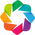

:Points   [Lon,Lat]   (gross_rent,sale_price_sqr_foot)

In [66]:
import hvplot.pandas
import geoviews as gv
from cartopy import crs
gv.extension('bokeh')

# Create a plot to analyze neighborhood info
neighborhoods_plot = all_neighborhoods_df.hvplot.points(
    geo=True,
    x='Lon',
    y='Lat',
    size='sale_price_sqr_foot',
    color='gross_rent',
    frame_width=700,
    frame_height=500,
    title='Average Sale Price per Square Foot and Gross Rent by Neighborhood',
    cmap='viridis',  # colormap for color scale
    clim=(all_neighborhoods_df['gross_rent'].min(), all_neighborhoods_df['gross_rent'].max()),  # color scale limits
    colorbar=True,
).opts(
    projection=crs.GOOGLE_MERCATOR,  # use Google Mercator projection
)

neighborhoods_plot

### Step 5: Use the interactive map to answer the following question:

**Question:** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer:** # Westwood Park ranks highest in both gross rent and sale price per square foot.

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question:**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer:** In looking at how rental income grows compared to the prices of homes in San Francisco, we find different trends in different parts of the city. Generally, when home prices go up, rental income also goes up. But this relationship isn't the same everywhere. Some areas see rental income growing faster than home prices, which suggests that renting is really popular there compared to buying. On the other hand, in some places, home prices are going up faster than rental income, which might mean that buying a home there is becoming more expensive compared to renting. It's important to remember that these trends can change from one neighborhood to another because of things like where the neighborhood is, what's around it, and how the real estate market is doing.

**Question:** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer:** After looking at the data, it seems like the idea of buying properties with just one click and then renting them out could be a good plan, especially in neighborhoods where rental income is growing quickly and faster than the prices of homes. These neighborhoods might be great for investors because they could make a steady income from rent and also see the value of their property go up over time. Some neighborhoods, like Westwood Park, have both high rent and high home prices, which suggests there's a lot of demand for rentals there and the value of homes is increasing. Other areas, like Buena Vista Park, also have rental income growing faster than home prices, making them attractive for investment too. But it's important for investors to do their homework first. They need to research the market, see how much demand there is for rentals, and make sure the numbers add up financially before deciding where to invest.